In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_Netflixs.csv to cleaned_Netflixs.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('cleaned_Netflixs.csv')

print(data.head())
print(data.info())
print(data.describe())

  show_id   type         title             director  \
0      s8  Movie       Sankofa         Haile Gerima   
1     s10  Movie  The Starling       Theodore Melfi   
2     s13  Movie  Je Suis Karl  Christian Schwochow   
3     s28  Movie     Grown Ups         Dennis Dugan   
4     s29  Movie    Dark Skies        Scott Stewart   

                                                cast  \
0  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
1  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
2  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
3  Adam Sandler, Kevin James, Chris Rock, David S...   
4  Keri Russell, Josh Hamilton, J.K. Simmons, Dak...   

                                             country  date_added  \
0  United States, Ghana, Burkina Faso, United Kin...  2021-09-24   
1                                      United States  2021-09-24   
2                            Germany, Czech Republic  2021-09-23   
3                                      United States  2021-0

In [ ]:
# Assuming you've loaded your dataset into df
missing_values = data.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20799 (\N{CJK UNIFIED IDEOGRAPH-513F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_

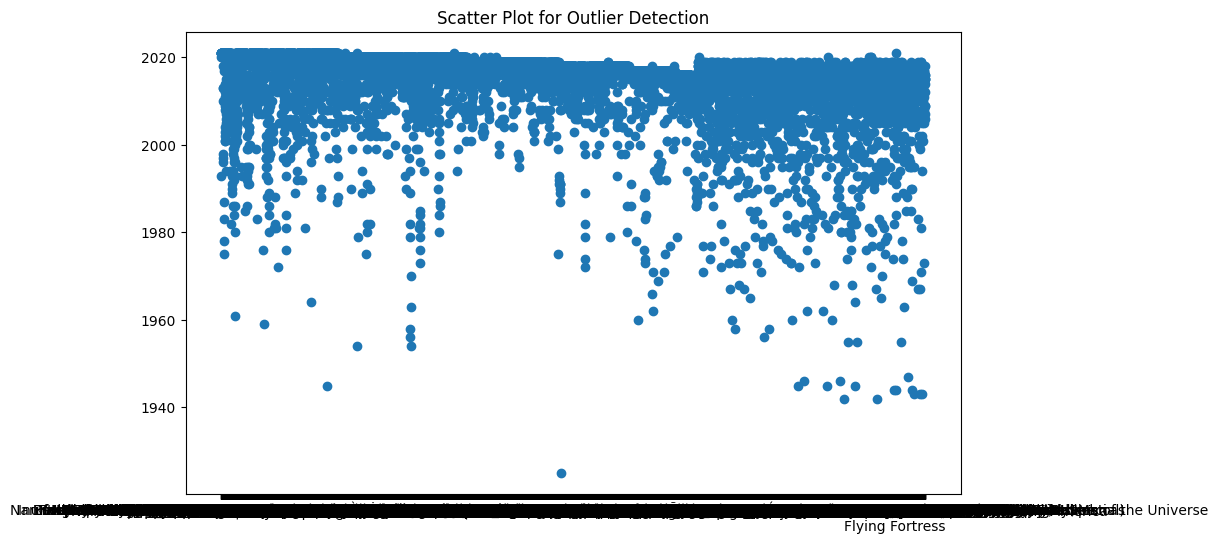

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['title'], data['release_year'])
plt.title('Scatter Plot for Outlier Detection')
plt.show()

In [ ]:
print(data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
# Extract duration number and type (e.g., 90 and 'min' or 'Season')
data[['duration_int', 'duration_type']] = data['duration'].str.extract(r'(\d+)\s*(\w+)')
data['duration_int'] = pd.to_numeric(data['duration_int'], errors='coerce')


Missing Values Count:
show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         98
release_year        0
rating              4
duration            3
listed_in           0
description         0
duration_int        3
duration_type       3
dtype: int64


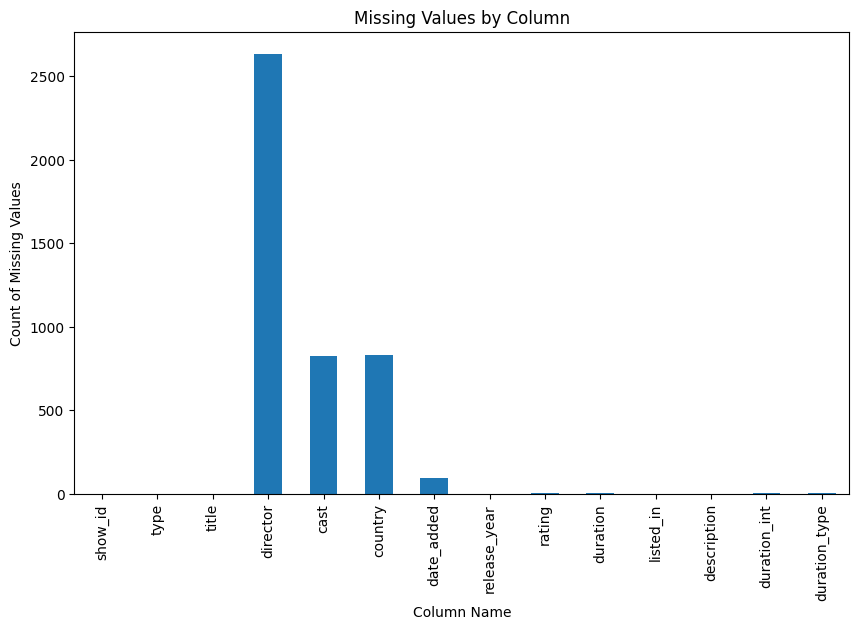

In [ ]:
# Get the count of missing values in each column
missing_values = data.isnull().sum()
print("Missing Values Count:")
print(missing_values)

# Visualize the missing values
plt.figure(figsize=(10, 6))
data.isnull().sum().plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Column Name')
plt.ylabel('Count of Missing Values')
plt.show()

In [ ]:
# Drop columns with more than 50% missing values
data = data.dropna(axis=1, thresh=len(data)*0.5)

# Drop rows with any missing values
data= data.dropna(axis=0, how='any')

In [ ]:
# Impute numerical columns with mean
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute categorical columns with mode (for meaningful categorical features only)
categorical_cols = ['type', 'rating', 'country', 'director', 'duration_type']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


Outlier bounds for release_year:
Lower bound: 2000.5
Upper bound: 2028.5


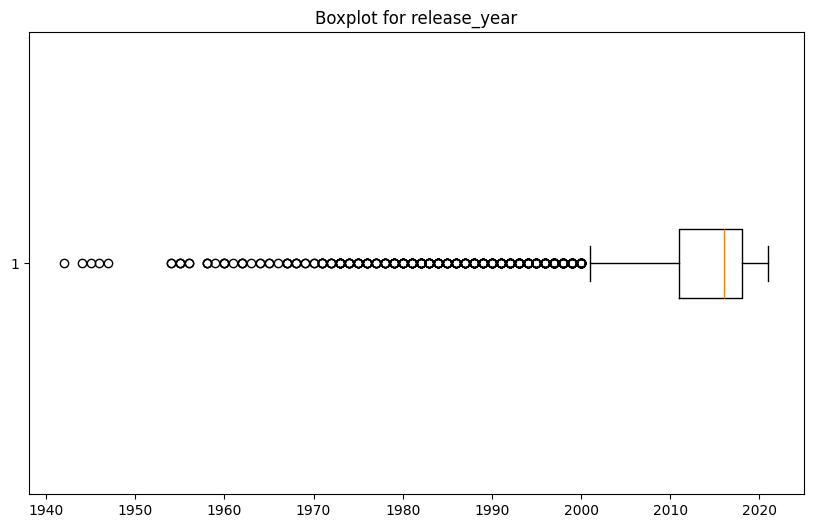

Outlier bounds for duration_int:
Lower bound: 46.0
Upper bound: 158.0


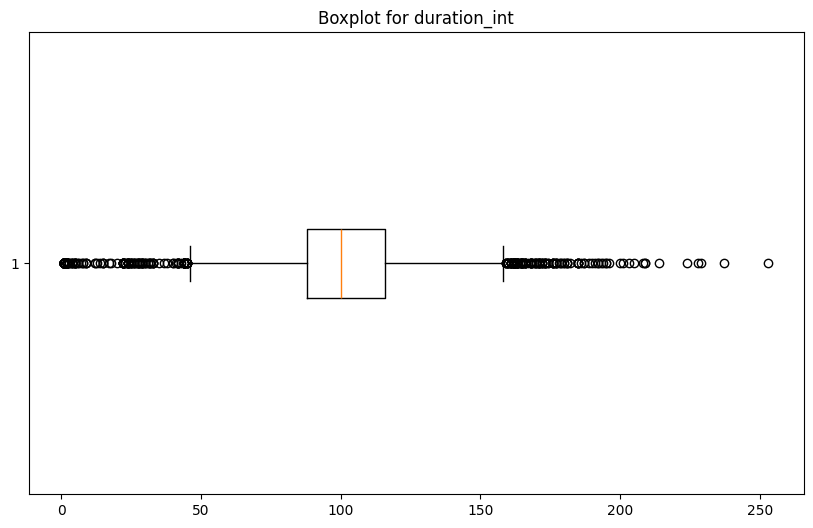

In [ ]:
numerical_df = data.select_dtypes(include=['int64', 'float64'])

for col in numerical_df.columns:
    Q1 = numerical_df[col].quantile(0.25)
    Q3 = numerical_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Outlier bounds for {col}:")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")

    # Visualize outliers using boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(numerical_df[col], vert=False)
    plt.title(f'Boxplot for {col}')
    plt.show()

In [ ]:
data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [ ]:
def cap_values(value, lower_bound, upper_bound):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    else:
        return value

# Apply capping to each numerical column
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = data[col].apply(lambda x: cap_values(x, lower_bound, upper_bound))

In [ ]:
# Save the cleaned DataFrame to a new CSV file
data.to_csv(r'C:\Users\ruket\Desktop\cleaned_Netflixs.csv', index=False)

In [ ]:
from google.colab import files
files.download('cleaned_Netflixs.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(data.shape)  # rows and columns
print(data.info())  # datatypes and nulls
print(data.describe())  # stats for numerical


(4949, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 4949 entries, 7 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        4949 non-null   object        
 1   type           4949 non-null   object        
 2   title          4949 non-null   object        
 3   director       4949 non-null   object        
 4   cast           4949 non-null   object        
 5   country        4949 non-null   object        
 6   date_added     4949 non-null   datetime64[ns]
 7   release_year   4949 non-null   float64       
 8   rating         4949 non-null   object        
 9   duration       4949 non-null   object        
 10  listed_in      4949 non-null   object        
 11  description    4949 non-null   object        
 12  duration_int   4949 non-null   float64       
 13  duration_type  4949 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 580.0+ 

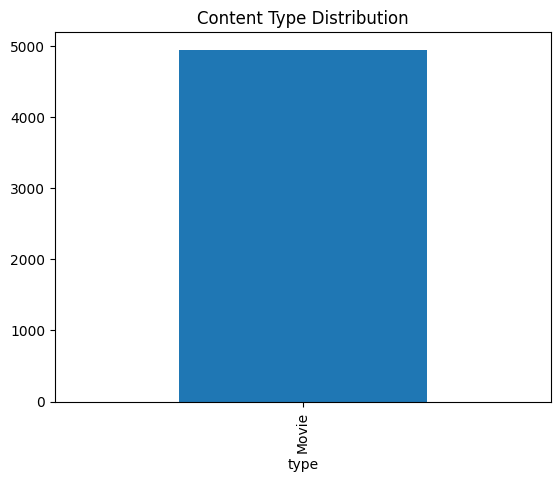

In [ ]:
data['type'].value_counts().plot(kind='bar', title='Content Type Distribution')
plt.show()


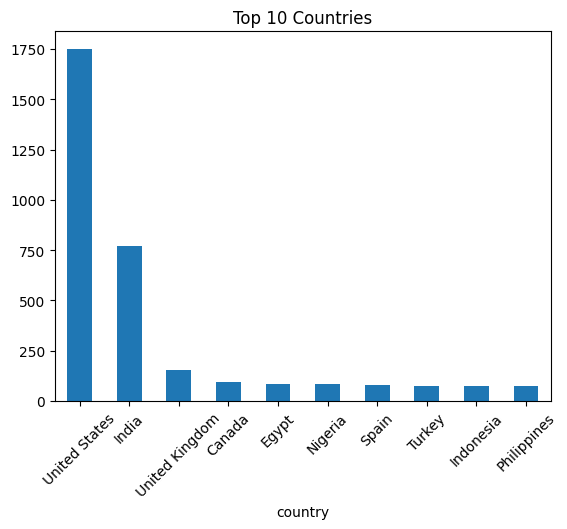

In [ ]:
data['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Countries')
plt.xticks(rotation=45)
plt.show()



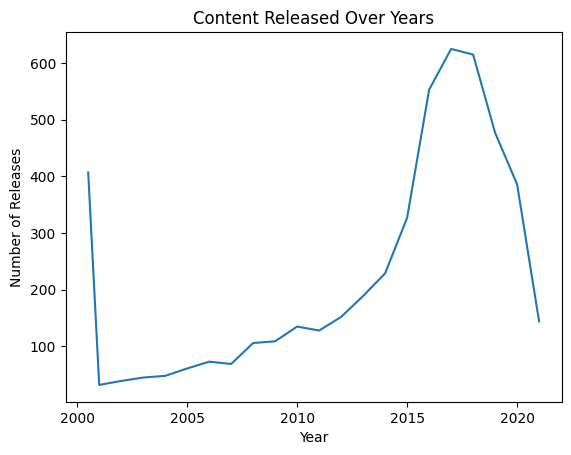

In [ ]:
data['release_year'].value_counts().sort_index().plot(kind='line', title='Content Released Over Years')
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()

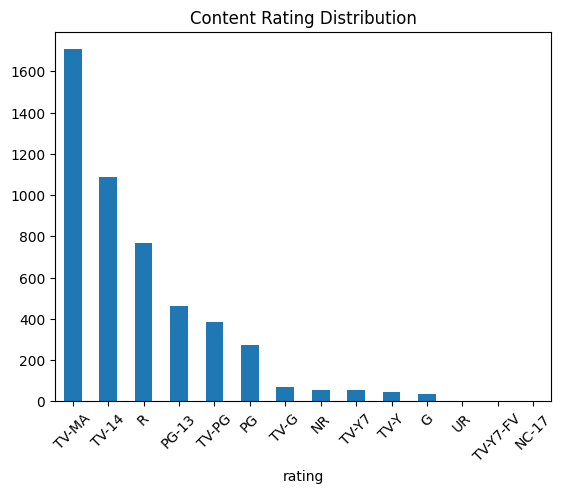

In [ ]:
data['rating'].value_counts().plot(kind='bar', title='Content Rating Distribution')
plt.xticks(rotation=45)
plt.show()

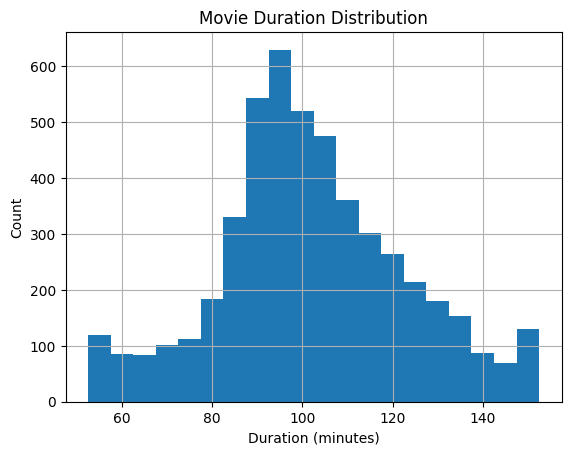

In [ ]:
# Ensure 'duration_int' column is available (you may have made this earlier)
movies = data[data['type'] == 'Movie']
movies['duration_int'].hist(bins=20)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

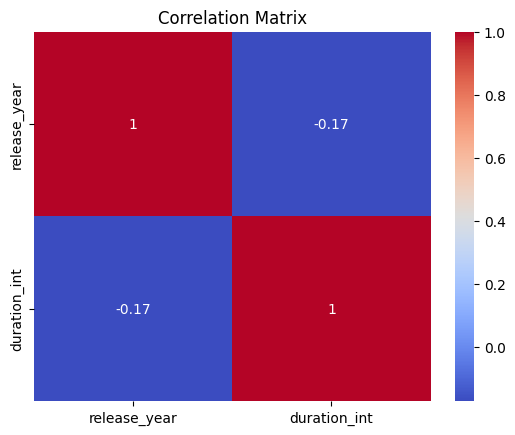

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


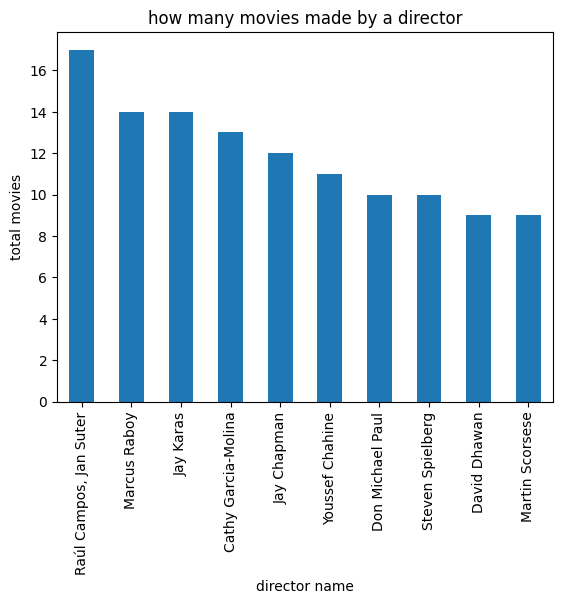

In [ ]:
data['director'].value_counts().head(10).plot(kind='bar', title='how many movies made by a director')
plt.xlabel("director name")
plt.ylabel("total movies")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset("tips")
basic_stats = tips.describe()
print("basic stats")
print(basic_stats)

basic stats
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [ ]:
# Calculate mean
mean_total = tips['total_bill'].max()
print(f"\nMean of Total Bill: {mean_total:.2f}")

# Calculate median
median_tip = tips['tip'].max()
print(f"Median of Tip: {median_tip:.2f}")

# Calculate mode
mode_sex = tips['sex'].mode()
print(f"Mode of Sex: {mode_sex}")


Mean of Total Bill: 50.81
Median of Tip: 10.00
Mode of Sex: 0    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']


In [ ]:
# Calculate range
range_total = tips['total_bill'].max() - tips['total_bill'].min()
print(f"\nRange of Total Bill: {range_total:.2f}")

# Calculate variance
variance_tip = tips['tip'].var()
print(f"Variance of Tip: {variance_tip:.2f}")

# Calculate standard deviation
std_total = tips['total_bill'].std()
print(f"Standard Deviation of Total Bill: {std_total:.2f}")


Range of Total Bill: 47.74
Variance of Tip: 1.91
Standard Deviation of Total Bill: 8.90


In [ ]:
# Calculate skewness
skew_total = tips['total_bill'].skew()
print(f"\nSkewness of Total Bill: {skew_total:.2f}")

# Calculate kurtosis
kurtosis_tip = tips['tip'].kurtosis()
print(f"Kurtosis of Tip: {kurtosis_tip:.2f}")


Skewness of Total Bill: 1.13
Kurtosis of Tip: 3.65


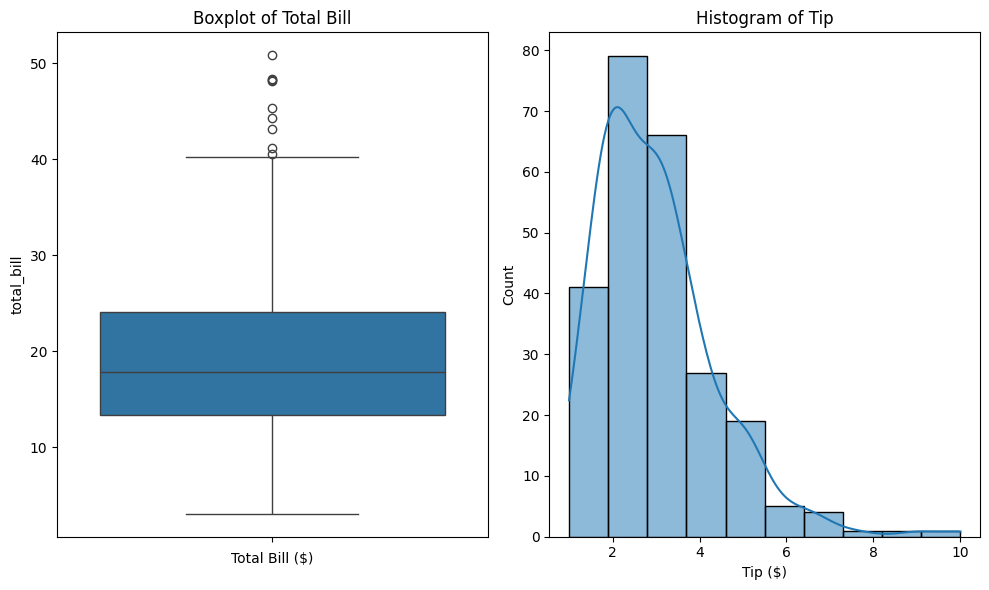

In [ ]:
plt.figure(figsize=(10, 6))

# Boxplot for Total Bill distribution
plt.subplot(1, 2, 1)
sns.boxplot(tips['total_bill'])
plt.title("Boxplot of Total Bill")
plt.xlabel("Total Bill ($)")

# Histogram for Tip distribution
plt.subplot(1, 2, 2)
sns.histplot(tips['tip'], bins=10, kde=True)
plt.title("Histogram of Tip")
plt.xlabel("Tip ($)")

plt.tight_layout()
plt.show()


Correlation Matrix:
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


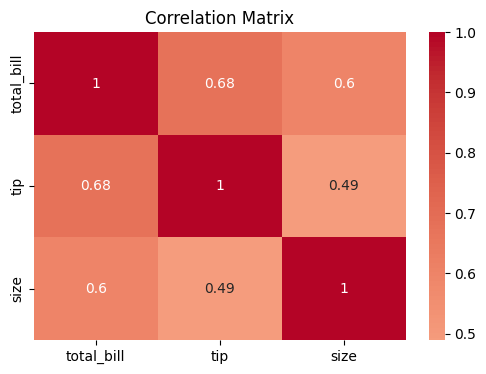

In [ ]:
# Calculate correlation matrix
corr_matrix = tips[['total_bill', 'tip', 'size']].corr()

print("\nCorrelation Matrix:")
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

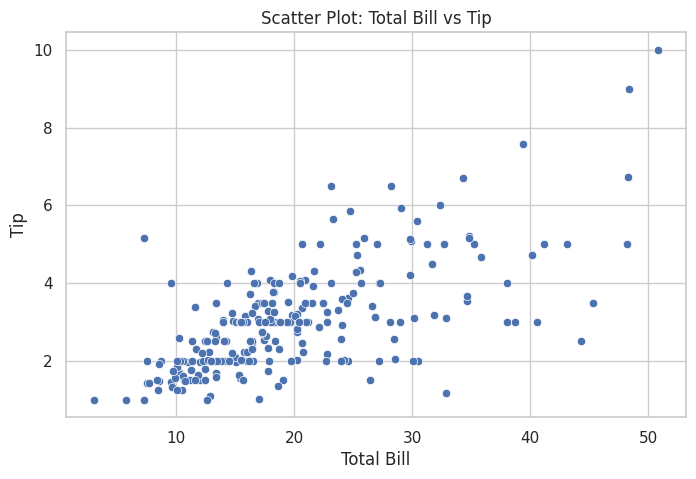

In [ ]:
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', data=tips)

# Add titles and labels
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()